In [1]:
# Import Dependencies
import pandas as pd
pd.options.mode.chained_assignment = None
from datetime import timedelta, date
import numpy as np
import matplotlib.pyplot as plt
import requests as requests
import time
from scipy import stats 
import json
from scipy.stats import linregress
from sklearn import datasets

In [2]:
#CDC COVID-19 mortality rate in the US by age and sex url
mort_url = "https://data.cdc.gov/resource/9bhg-hcku"

In [3]:
df_mort = pd.read_json("https://data.cdc.gov/resource/9bhg-hcku.json?$limit=1000000")


In [4]:
#Check number of rows to make sure all datas are included from API
len(df_mort)

68850

In [39]:
# Displaying one record 
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68850 entries, 0 to 68849
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_as_of                     68850 non-null  object 
 1   start_date                     68850 non-null  object 
 2   end_date                       68850 non-null  object 
 3   group                          68850 non-null  object 
 4   state                          68850 non-null  object 
 5   sex                            68850 non-null  object 
 6   age_group                      68850 non-null  object 
 7   covid_19_deaths                51542 non-null  float64
 8   total_deaths                   58997 non-null  float64
 9   pneumonia_deaths               47899 non-null  float64
 10  pneumonia_and_covid_19_deaths  51771 non-null  float64
 11  influenza_deaths               57588 non-null  float64
 12  pneumonia_influenza_or_covid   48491 non-null 

In [6]:
#data frame with required fields
new_df=df_mort[["group","year","month","state","sex","age_group","covid_19_deaths",
                "total_deaths"]]
pd.options.display.float_format = "{:.0f}".format

In [7]:
new_df

,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,By Total,NaN,NaN,United States,All Sexes,All Ages,736875,6010446
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,137,33901
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,558,60066
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,65,6313
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,177,10030
...,...,...,...,...,...,...,...,...
68845,By Month,2021,10,Puerto Rico,Female,50-64 years,NaN,50
68846,By Month,2021,10,Puerto Rico,Female,55-64 years,NaN,36
68847,By Month,2021,10,Puerto Rico,Female,65-74 years,NaN,49
68848,By Month,2021,10,Puerto Rico,Female,75-84 years,NaN,96


In [8]:
#remove October 2021 data
new_df.drop(new_df.loc[(new_df["month"] == 10)&(new_df["year"] == 2021)].index, inplace=True)

In [9]:
#Dropping data for age_groups -"Under 1 year", "1-4 years", "All Ages","5-14 years","15-24 years"
# and "25-34 years" , "35-44 years",  "45-54 years",  "55-64 years"

new_df.drop(new_df.loc[new_df["age_group"]=="Under 1 year"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="1-4 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="All Ages"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="5-14 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="15-24 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="25-34 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="35-44 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="45-54 years"].index, inplace=True) 
new_df.drop(new_df.loc[new_df["age_group"]=="55-64 years"].index, inplace=True)

#Dropping data for total states number
new_df.drop(new_df.loc[new_df["state"]=="United States"].index, inplace=True)
#Dropping data for total sex number
new_df.drop(new_df.loc[new_df["sex"]=="All Sexes"].index, inplace=True)
#Dropping all rows with empty cells
new_df = new_df.dropna()





In [10]:
#check new_df with dropped rows
new_df

,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
9403,By Month,2020,1,Alabama,Male,0-17 years,0,44
9407,By Month,2020,1,Alabama,Male,18-29 years,0,53
9409,By Month,2020,1,Alabama,Male,30-39 years,0,67
9411,By Month,2020,1,Alabama,Male,40-49 years,0,129
9415,By Month,2020,1,Alabama,Male,65-74 years,0,588
...,...,...,...,...,...,...,...,...
68790,By Month,2021,9,Puerto Rico,Female,30-39 years,0,10
68794,By Month,2021,9,Puerto Rico,Female,50-64 years,31,139
68796,By Month,2021,9,Puerto Rico,Female,65-74 years,26,198
68797,By Month,2021,9,Puerto Rico,Female,75-84 years,27,346


In [11]:
#checking total deaths 
new_df["covid_19_deaths"].sum()

704202.0

In [12]:
#reset index for dataframe
new_df.reset_index()

,index,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,9403,By Month,2020,1,Alabama,Male,0-17 years,0,44
1,9407,By Month,2020,1,Alabama,Male,18-29 years,0,53
2,9409,By Month,2020,1,Alabama,Male,30-39 years,0,67
3,9411,By Month,2020,1,Alabama,Male,40-49 years,0,129
4,9415,By Month,2020,1,Alabama,Male,65-74 years,0,588
...,...,...,...,...,...,...,...,...,...
11166,68790,By Month,2021,9,Puerto Rico,Female,30-39 years,0,10
11167,68794,By Month,2021,9,Puerto Rico,Female,50-64 years,31,139
11168,68796,By Month,2021,9,Puerto Rico,Female,65-74 years,26,198
11169,68797,By Month,2021,9,Puerto Rico,Female,75-84 years,27,346


In [13]:
# Group dataframe by gender and show total deaths for each - Data for Pie Chart
gender_df=new_df.groupby(by=["sex"]).sum()
gender_df = gender_df.drop("year",1)
gender_df = gender_df.drop("month",1)
gender_df



,covid_19_deaths,total_deaths
sex,,
Female,315367,2543121
Male,388835,2819859


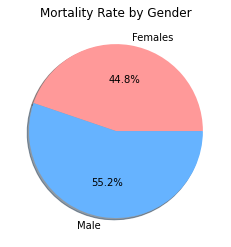

In [14]:
#Create pie chart for number of deaths by gender
labels = "Females", "Male"
sizes=gender_df["covid_19_deaths"]
colors = ['#ff9999','#66b3ff']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,colors = colors);
plt.title("Mortality Rate by Gender");
plt.savefig("./mkfg_figures/Mortalityratebygender.png")
plt.show()



In [15]:
#Number of deaths by age group - Data for scatter plot

#Group dataframe by age group
age_group_df=new_df.groupby(by=["age_group"]).sum()

#remove columns year and months
age_group_df = age_group_df.drop("year",1)
age_group_df = age_group_df.drop("month",1)

covid_19_deaths_sum = age_group_df["covid_19_deaths"].sum()
total_deaths_sum = age_group_df["total_deaths"]

age_group_df

,covid_19_deaths,total_deaths
age_group,,
0-17 years,10,38461
18-29 years,1717,49187
30-39 years,8065,81139
40-49 years,25070,166689
50-64 years,126426,923846
65-74 years,160943,1132053
75-84 years,187641,1358032
85 years and over,194330,1613573


In [16]:
#Slice the dataframe for linear regression

df2 = age_group_df['covid_19_deaths'].to_frame(name = 'sum').reset_index()
pd.options.display.float_format = "{:.0f}".format
#Check new dataframe
df2



,age_group,sum
0,0-17 years,10
1,18-29 years,1717
2,30-39 years,8065
3,40-49 years,25070
4,50-64 years,126426
5,65-74 years,160943
6,75-84 years,187641
7,85 years and over,194330


The r squared value : 0.9499767048076073


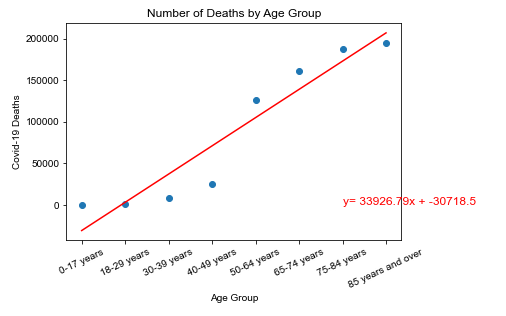

In [17]:

#Plot Linear regression
df2 = age_group_df['covid_19_deaths'].to_frame(name = 'sum').reset_index()


x = np.array(df2.iloc[:,0].index.tolist())

y=np.array(df2.iloc[:,1].astype(float).to_list())


xticks_name=df2.iloc[:,0]

x_pos = np.arange(len(xticks_name))

 
# Create scatter plot
plt.xticks(x_pos, xticks_name,rotation=25)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x,y)

vc_fit = vc_slope * x + vc_int
print(f"The r squared value : {vc_r}")
line_eq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.scatter(x,y)

plt.plot(x,vc_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.title("Number of Deaths by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Covid-19 Deaths')
plt.savefig("./mkfg_figures/Mortalityratebyagegroup.png",bbox_inches='tight')
plt.style.use("seaborn")
plt.show()

In [18]:
#Number of deaths by state - Data horizontal bar graph
state_df=new_df.groupby(by=["state"]).sum()
#Combine New York State and New York City numbers
state_df.loc['New York'] += state_df.loc['New York City']
state_df.drop(['New York City'], inplace=True)
state_df = state_df.drop("year",1)
state_df = state_df.drop("month",1)


In [19]:
#check new dataframe
state_df.head()

,covid_19_deaths,total_deaths
state,,
Alabama,14483,102500
Alaska,265,3772
Arizona,18017,126422
Arkansas,7875,56289
California,73510,554819


In [20]:
desc_state_df= state_df.sort_values("covid_19_deaths",ascending=False)

In [ ]:
# Mortlaity by State counts sorted in descending order
desc_state_df["covid_19_deaths"]

In [22]:
desc_state_df.iloc[0:5]
top5states_df=desc_state_df.head()


<ipython-input-23-be73bbf3083b>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


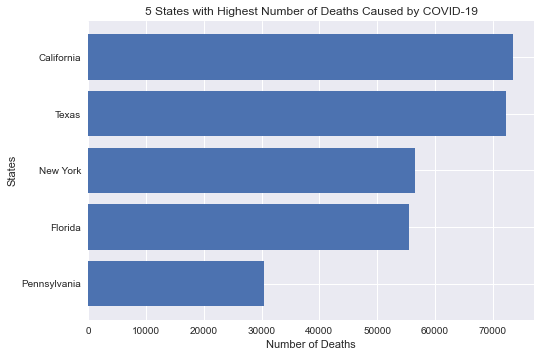

In [23]:
#height=sorted_state_df["covid_19_deaths"].astype(int).iloc[0:10].to_string(index=False,header=False)
height=desc_state_df["covid_19_deaths"].astype(int).iloc[0:5].to_list()
bars=desc_state_df.index.tolist()[0:5]
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
ax=plt.subplot()
ax.invert_yaxis() 
# Show graphic
plt.ylabel("States")
plt.xlabel("Number of Deaths")
plt.title("5 States with Highest Number of Deaths Caused by COVID-19")
plt.savefig("./mkfg_figures/Mortalityratebystate-top5.png")
plt.show()


        

<ipython-input-24-b2982d5920ef>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


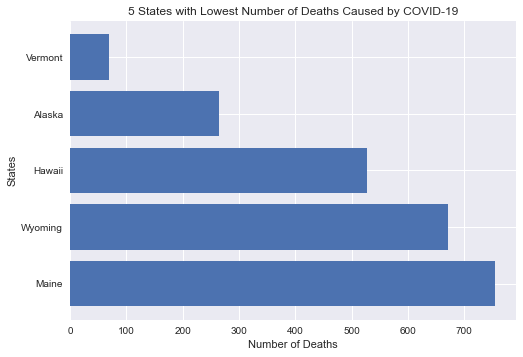

In [24]:
asc_state_df= state_df.sort_values("covid_19_deaths",ascending=True)

#height=sorted_state_df["covid_19_deaths"].astype(int).iloc[0:10].to_string(index=False,header=False)
height=asc_state_df["covid_19_deaths"].astype(int).iloc[0:5].to_list()
bars=asc_state_df.index.tolist()[0:5]
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
ax=plt.subplot()
ax.invert_yaxis() 
# Show graphic
plt.ylabel("States")
plt.xlabel("Number of Deaths")
plt.title("5 States with Lowest Number of Deaths Caused by COVID-19")
plt.savefig("./mkfg_figures/Mortalityratebystate-low5.png")
plt.show()



In [25]:
#Number of deaths for Gender types for different age groups - Stacked bar graph

gender_agegroup_df=new_df.groupby(by=["sex","age_group"]).sum()
gender_agegroup_df = gender_agegroup_df.drop("year",1)
gender_agegroup_df = gender_agegroup_df.drop("month",1)

In [26]:
#check new dataframe
gender_agegroup_df

covid_19_deaths  total_deaths
sex    age_group                                       
Female 0-17 years                      10         15905
       18-29 years                    601         13332
       30-39 years                   2702         23751
       40-49 years                   8496         54910
       50-64 years                  46428        340986
       65-74 years                  63949        466463
       75-84 years                  82101        642933
       85 years and over           111080        984841
Male   0-17 years                       0         22556
       18-29 years                   1116         35855
       30-39 years                   5363         57388
       40-49 years                  16574        111779
       50-64 years                  79998        582860
       65-74 years                  96994        665590
       75-84 years                 105540        715099
       85 years and over            83250        628732

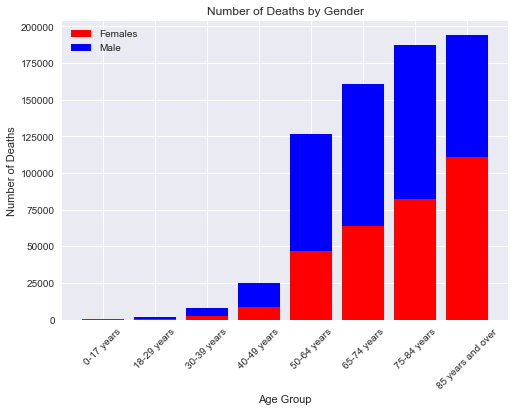

In [27]:
# Number of deaths by age group - Data for stack bars

x=gender_agegroup_df.xs('Female',level='sex').index.to_list()
y1=gender_agegroup_df.xs('Female',level='sex')["covid_19_deaths"].astype(int).to_list()
y2=gender_agegroup_df.xs('Male',level='sex')["covid_19_deaths"].astype(int).to_list()

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.xticks(rotation = 45)

plt.ylabel("Number of Deaths")
plt.xlabel("Age Group")
plt.title("Number of Deaths by Gender")
# Show graphic
plt.legend(labels,loc='upper left')
plt.savefig("./mkfg_figures/NumberofdeathsStackBar.png",bbox_inches='tight')
plt.show()




In [28]:
#Number of total death count per year 

Year_group_df=new_df.groupby(by=["year"]).sum()

new_df["covid_19_deaths"].sum()
new_df.groupby(by=["year"]).sum()

,month,covid_19_deaths,total_deaths
year,,,
2020,41637,377868,3075691
2021,22186,326334,2287289


In [29]:
#Number of deaths by Year and months

year_month_df=new_df.groupby(by=["year","month"]).sum()
year_month_df


covid_19_deaths  total_deaths
year month                               
2020 1                    0        263337
     2                    0        231026
     3                 6248        172857
     4                64671        300608
     5                37402        254425
     6                17095        221032
     7                30223        252012
     8                29195        251205
     9                18427        228351
     10               24204        254615
     11               52640        288536
     12               97763        357687
2021 1               104714        363173
     2                47607        267679
     3                22166        246857
     4                17629        229968
     5                13784        228075
     6                 6698        193870
     7                 9825        203184
     8                46451        277306
     9                57460        277177

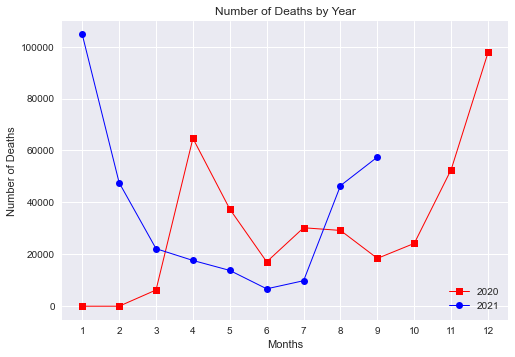

In [30]:
#Create double line graph to show number of deaths by year and month
df_year2020=new_df.loc[new_df["year"]==2020]
df_year2020

df_year2020_1 = df_year2020.groupby(by=["month"]).sum()
df_year2020_1

df_year2020_1.index.astype(int).tolist()
plt.plot(df_year2020_1.index.astype(int).tolist(),df_year2020_1["covid_19_deaths"], marker="s", color="Red", linewidth=1, label="2020")

df_year2021=new_df.loc[new_df["year"]==2021]
df_year2021

df_year2021_1 = df_year2021.groupby(by=["month"]).sum()
df_year2021_1

df_year2021_1.index.astype(int).tolist()

plt.plot(df_year2021_1.index.astype(int).tolist(),df_year2021_1["covid_19_deaths"], marker="o", color="Blue", linewidth=1, label="2021")
plt.xticks(df_year2020_1.index.astype(int).tolist())
plt.title("Number of Deaths by Year")
plt.xlabel("Months")
plt.ylabel("Number of Deaths")

plt.legend()

plt.savefig("./mkfg_figures/lineplotbyyear.png")

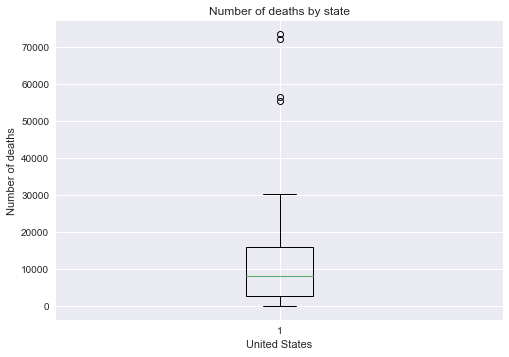

In [31]:
state_box = state_df["covid_19_deaths"]

fig1, ax1 = plt.subplots()
ax1.set_title('Number of deaths by state')
ax1.set_ylabel('Number of deaths')
ax1.set_xlabel('United States')
ax1.boxplot(state_box)
plt.savefig("./mkfg_figures/boxandwhiskerplot.png",bbox_inches='tight')
plt.show()

In [37]:
quartiles = state_box.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of number of deaths is: {lowerq}")
print(f"The upper quartile of number of deaths is: {upperq}")
print(f"The interquartile range of number of deaths is: {iqr}")
print(f"The the median of number of deaths is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of number of deaths is: 2703.25
The upper quartile of number of deaths is: 16107.5
The interquartile range of number of deaths is: 13404.25
The the median of number of deaths is: 8143.5 
Values above 36213.875 could be outliers.
